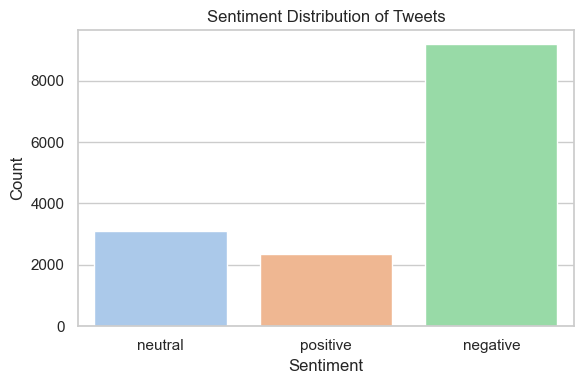


📊 Classification Report:

              precision    recall  f1-score   support

    negative       0.81      0.93      0.87      1835
     neutral       0.64      0.49      0.55       620
    positive       0.82      0.58      0.68       473

    accuracy                           0.78      2928
   macro avg       0.75      0.67      0.70      2928
weighted avg       0.77      0.78      0.77      2928



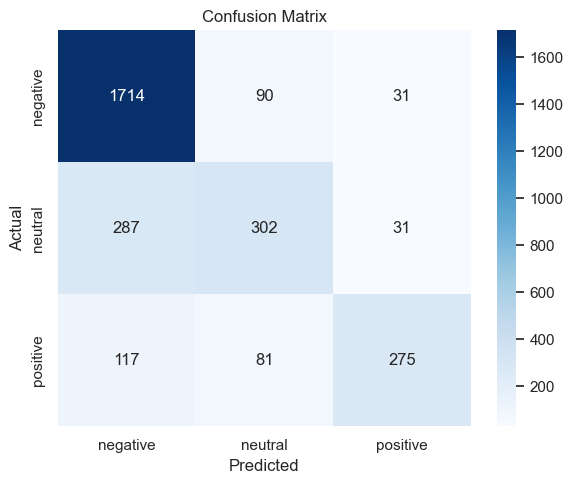


📝 Sample Tweet Predictions:

Tweet Text:
@AmericanAir I need refund.
→ Predicted Sentiment: negative

Tweet Text:
@JetBlue thanks for bringing my son home to me.
→ Predicted Sentiment: positive

Tweet Text:
@AmericanAir No! We departed 24 hours Late Flightr, with a crazy crew. One of the lady simply freaked out and got away from job before departure.
→ Predicted Sentiment: negative

Tweet Text:
@SouthwestAir love..luv the addition of the passbook option.
→ Predicted Sentiment: positive

Tweet Text:
@AmericanAir LITERALLY just told me they'd rather have an empty seat than my mom get to come earlier &amp; take me to Dr. appointment. WOW
→ Predicted Sentiment: negative


In [5]:
# sentiment_analysis_airline_tweets.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# 1. Load dataset
df = pd.read_csv("Tweets.csv")
df = df.dropna(subset=["airline_sentiment", "text"])

# 2. Visualize sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="airline_sentiment", palette="pastel")
plt.title("Sentiment Distribution of Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 3. Prepare features and labels
X = df["text"]
y = df["airline_sentiment"]

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 6. Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# 7. Evaluate the model
y_pred = model.predict(X_test_tfidf)
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# 8. Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 9. Show a few sample predictions
sample_texts = X_test.sample(5, random_state=42)
sample_preds = model.predict(vectorizer.transform(sample_texts))

print("\n📝 Sample Tweet Predictions:")
for text, pred in zip(sample_texts, sample_preds):
    print(f"\nTweet Text:\n{text}\n→ Predicted Sentiment: {pred}")

